In this project you will learn to build a Naïve Bayes model using Scikit-learn
 to classify breast cancer as either Malignant or Benign. You will use the
 Breast Cancer Wisconsin (Diagnostic) Data Set Provided. By the end of this project, you will be able to build the Naïve Bayes model to classify between
cancerous and noncancerous patients. follow all the necessary steps from
data analysis, data exploration to testing the model accuracy.

##Import the necessary Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Load the dataset

In [16]:
Breast_cancer=pd.read_csv('Breast_cancer_data.csv')

In [17]:
Breast_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


##Data Exploration

In [18]:
##checking missing values
Breast_cancer.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


In [19]:
##checking the basic data info
Breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [20]:
##checking statistical summary
Breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


##Data Visualization

# Visualize the distribution of diagnoses

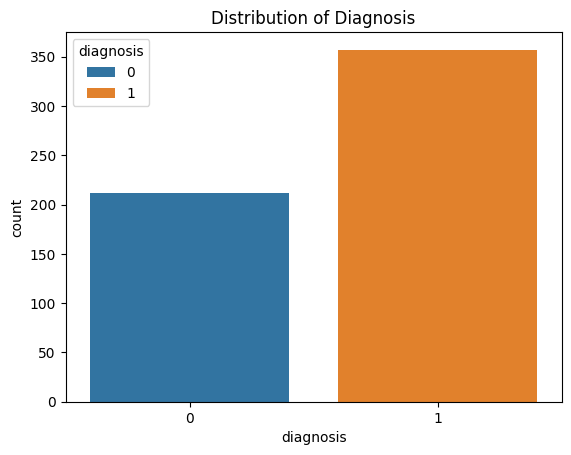

In [21]:
# Visualize the distribution of diagnoses
sns.countplot(x='diagnosis', data=Breast_cancer,hue='diagnosis')
plt.title('Distribution of Diagnosis')
plt.show()

##Histplot of mean radius distribution by diagnosis

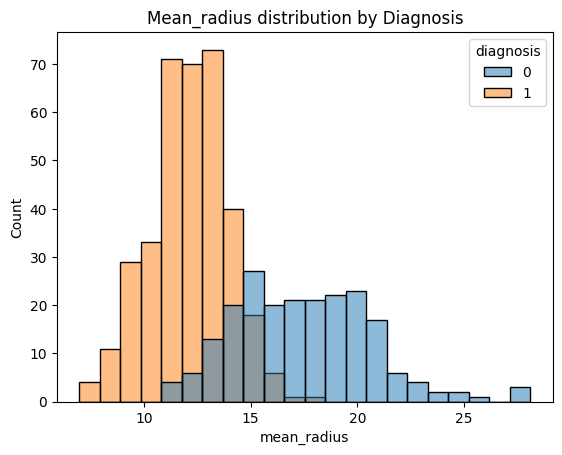

In [37]:
sns.histplot(x='mean_radius', data=Breast_cancer,color="green",hue='diagnosis')
plt.title('Mean_radius distribution by Diagnosis')
plt.show()

##Histplot of mean texture distribution by diagnosis distribution

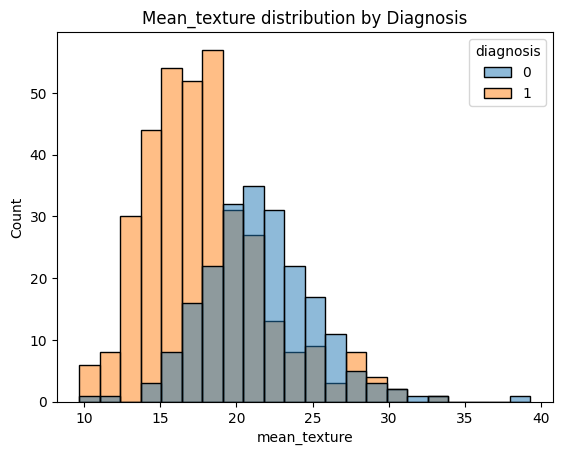

In [36]:
sns.histplot(x='mean_texture', data=Breast_cancer,hue='diagnosis')
plt.title('Mean_texture distribution by Diagnosis')
plt.show()

##Histplot of mean perimeter distribution by diagnosis

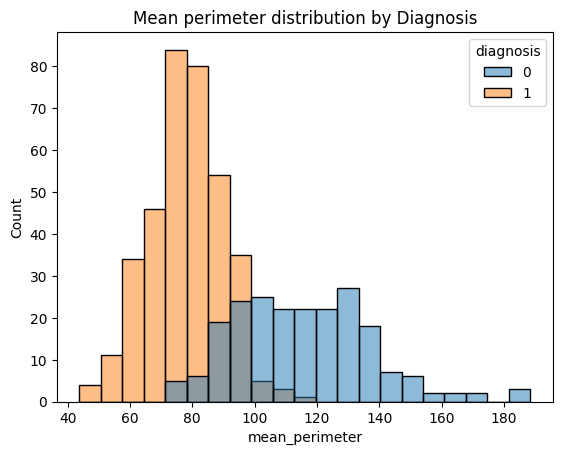

In [35]:
sns.histplot(x='mean_perimeter', data=Breast_cancer,hue="diagnosis")
plt.title('Mean perimeter distribution by Diagnosis')
plt.show()

# Boxplot of mean_area by diagnosis

Text(0.5, 0.98, '')

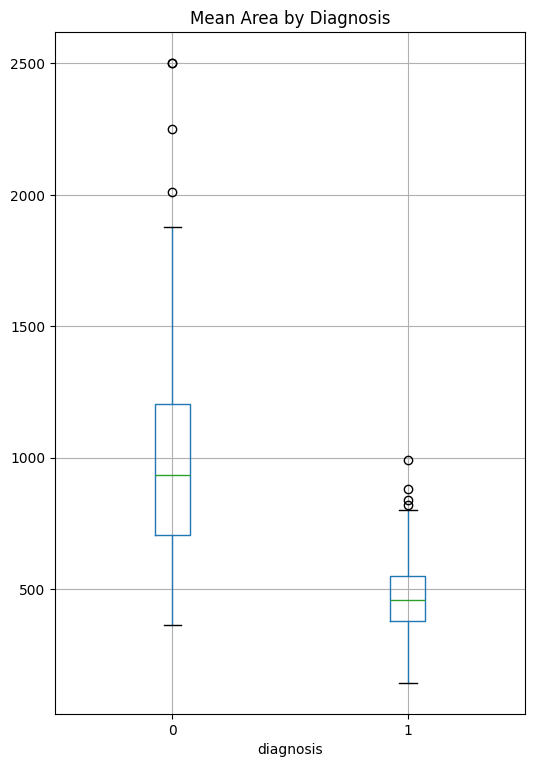

In [41]:
plt.figure(figsize=(20,20))
plt.subplot(2, 3, 5)
Breast_cancer.boxplot(column='mean_area', by='diagnosis', ax=plt.gca())
plt.title('Mean Area by Diagnosis')
plt.suptitle('')

# Scatter plot of mean_radius vs mean_area

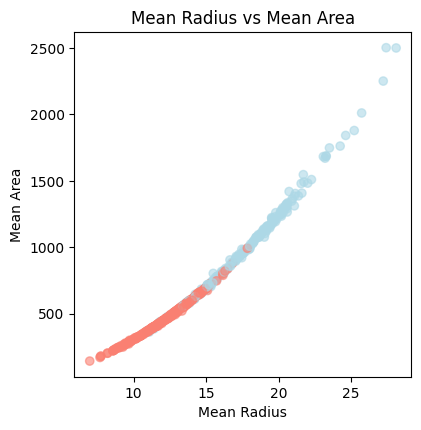

In [40]:
plt.figure(figsize=(12,8))
plt.subplot(2, 3, 6)
colors = ['lightblue' if x == 0 else 'salmon' for x in Breast_cancer['diagnosis']]
plt.scatter(Breast_cancer['mean_radius'], Breast_cancer['mean_area'], c=colors, alpha=0.6)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Area')
plt.title('Mean Radius vs Mean Area')

plt.tight_layout()
plt.show()

#Correlation heatmap

In [22]:
corr_matrix=Breast_cancer.corr()


In [23]:
corr_matrix

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


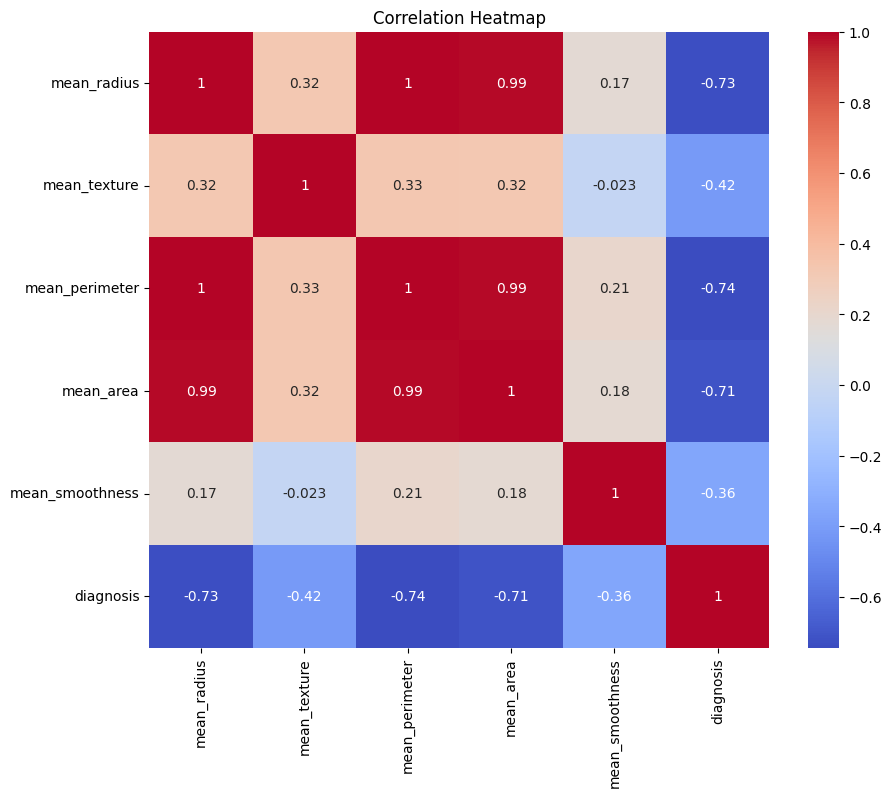

In [24]:
##plotting a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



##Preparation of data for modelling

In [42]:
x=Breast_cancer.drop('diagnosis',axis=1)
y=Breast_cancer['diagnosis']

##Split the data into training and testing sets

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##Train the Naïve Bayes Model

In [44]:
nb_model = GaussianNB()

fit the model

In [45]:
##fitting the model
nb_model.fit(x_train,y_train)

GaussianNB()

##Evaluating the model

In [46]:
##predicting the test data
y_pred=nb_model.predict(x_test)

In [47]:
##model accuracy
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)


Accuracy: 0.9385964912280702


In [48]:
##classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [49]:
##confusion matrix
confusion_matrix(y_test,y_pred)

array([[36,  7],
       [ 0, 71]])

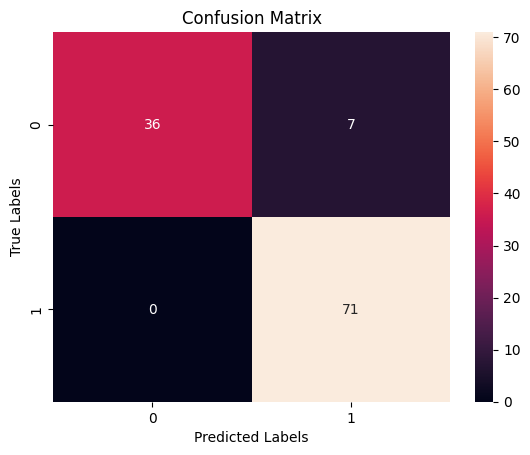

In [50]:
##visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

